In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

import time  # useful to time your algorithm

In [ ]:
def ForwardFiniteDiff(f,x,dx=1e-6,xopt_true=None):
  return ( f(x+dx) - f(x) ) / (dx)

def CentralFiniteDiff(f,x,dx=1e-6): 
  return ( f(x+dx) - f(x-dx)) / (2*dx)

def SecondOrderFiniteDiff(f,x,dx=1e-6): 
  return ( f(x+dx) - 2*f(x) + f(x-dx) ) / (dx**2) 


def BisectionOpt(f,x0,x1,tol=1e-6,search_min=True,xtrue=None): 
   # initialize: 
    data, Ea = [], []     
    # Get number of bisections for desired tolerance: 
    N = int(np.ceil(np.log(abs(x1 - x0)/tol)/np.log(2.0)))
    print(f'{N} bisections required for a tolerance of {tol}.')
    
    max_iter = 100 
    for i in range(max_iter): 
        if i == 0: 
            xr = 0.5 * (x0 + x1)
            data.append([x0,x1,np.nan,xr])
            Ea.append(np.nan)
        else: 
            xr_old = xr
            xr = 0.5 * (x0 + x1)
            # update bracket:
            dfxr = ForwardFiniteDiff(f,xr)                
            if dfxr ==0: 
                break
            # if searching for a max, the opposite is true regarding dfxr below.
            if search_min is False: 
                dfxr = -dfxr
            
            if dfxr > 0:
                bracket = [x0,xr]
            elif dfxr < 0: 
                bracket = [xr,x1]
            
            x0, x1 = bracket
            xr = 0.5 * (x0 + x1)           
            data.append([x0,x1,dfxr,xr])
            # calculate approx error:
            err = abs((xr - xr_old)/xr) * 100 
            Ea.append(err)
            if err < tol: 
                break
        
    # collect data into DataFrame
    data = pd.DataFrame(data,columns=['x_low','x_up','dfx','x_root'])
    data['Ea'] = Ea
    # calculate true error (Et) if possible:
    if xtrue is not None: 
        data['Et'] = abs((data.x_root - xtrue)/xtrue) * 100
    print(f'numerical root = {xr}')
    print(f'approx. error  = {Ea[-1]}%')
    return xr, data


def NewtonRaphsonOpt(f,x0,tol=1e-6,alpha=1,xtrue=None): 
  data = [] 
  data.append([x0, f(x0), np.nan,np.nan,np.nan])
  for i in range(50):
    # estimate f' and f'' numerically
    dfdx = CentralFiniteDiff(f,x0)
    df2dx2 = SecondOrderFiniteDiff(f,x0)
    # update x
    x = x0 - (alpha * dfdx/df2dx2)
    Ea = 100 * abs( (x-x0)/x )
    # collect data, include f' and f'' for checks of optima
    data.append([x, f(x), np.round(dfdx,6), np.round(df2dx2,6), Ea])
    if Ea < tol: 
      break
    else: 
      x0 = x 
  data = pd.DataFrame(data,columns=['x','fx','dfdx','dfdx2','Ea'])
  # Add Et if possible: 
  if xtrue is not None: 
    data['Et'] = abs((xtrue - data.x)/xtrue)*100
  return x, data
    

  


In [ ]:
def myax(ax):
    ax.grid(True,alpha=0.2)
    ax.axhline(0,lw=1,c='k')
    ax.axvline(0,lw=1,c='k')
    ax.legend()

def plot_eq(f,bounds,ax):
    b0,b1 = bounds 
    x = np.linspace(b0,b1,100)
    ax.plot(x,f(x),label='f(x)')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    myax(ax) 

def plot_opt(f,root,ax,meth):
    ax.scatter(root,f(root),ec='k',label=meth)    
      
def plot_err(res,ax,subtitle): 
    ax.plot(res.index[1:],res.Ea[1:],label=r'$E_a$')
    ax.plot(res.index,res.Et,ls='--',label=r'$E_t$')
    ax.set_title(subtitle)
    myax(ax)

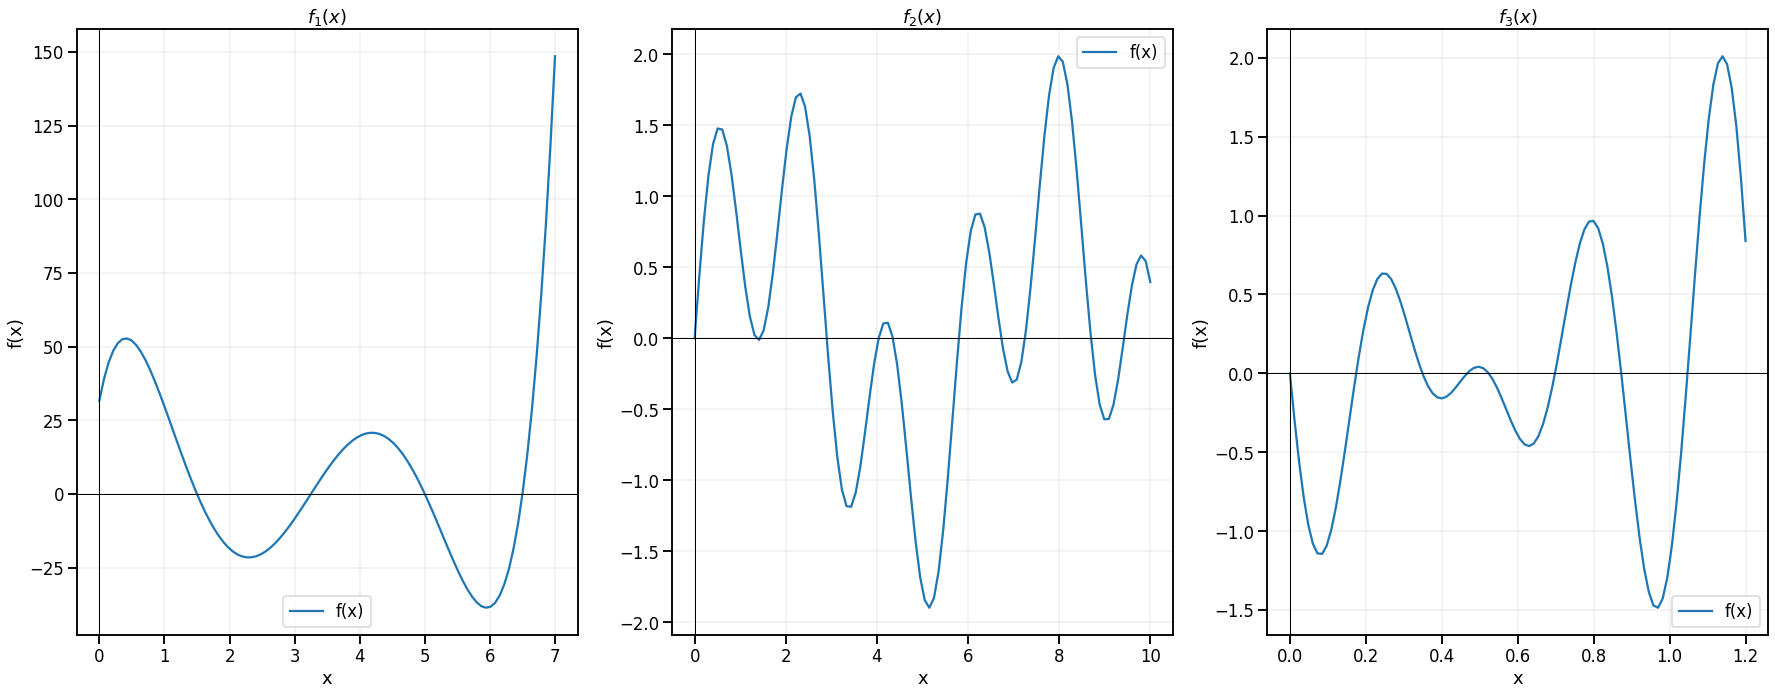

In [ ]:
def f1(x): 
    P5,P4,P3,P2,P1,P0 = [1.0, -16.05, 88.75,-192.0375,116.35,31.6875]
    return P5*x**5 + P4*x**4 + P3*x**3 + P2*x**2 + P1*x**1 + P0 

def f2(x):
    return np.sin(x) + np.sin(10*x/3)

def f3(x): 
    return -(1.4 - 3*x) * np.sin(18*x)


sb.set_context('talk')
fig,axes = plt.subplots(1,3,squeeze=True,figsize=(25,10))
plot_eq(f1,(0,7),axes[0]); axes[0].set_title(r'$f_1(x)$')
plot_eq(f2,(0,10),axes[1]); axes[1].set_title(r'$f_2(x)$')
plot_eq(f3,(0,1.2),axes[2]); axes[2].set_title(r'$f_3(x)$')
fig.tight_layout()


22 bisections required for a tolerance of 1e-06.
numerical root = 5.948298290371895
approx. error  = 7.515339917283814e-07%
       x_low      x_up           dfx    x_root            Ea        Et
0   4.000000  7.000000           NaN  5.500000           NaN  7.536607
1   5.500000  7.000000 -4.796248e+01  6.250000  1.200000e+01  5.072037
2   5.500000  6.250000  7.183844e+01  5.875000  6.382979e+00  1.232285
3   5.875000  6.250000 -1.209441e+01  6.062500  3.092784e+00  1.919876
4   5.875000  6.062500  2.279135e+01  5.968750  1.570681e+00  0.343796
5   5.875000  5.968750  3.718168e+00  5.921875  7.915567e-01  0.444245
6   5.921875  5.968750 -4.578718e+00  5.945312  3.942181e-01  0.050224
7   5.945312  5.968750 -5.300262e-01  5.957031  1.967213e-01  0.146786
8   5.945312  5.957031  1.568871e+00  5.951172  9.845750e-02  0.048281
9   5.945312  5.951172  5.131523e-01  5.948242  4.925300e-02  0.000972
10  5.948242  5.951172 -9.998189e-03  5.949707  2.462043e-02  0.023654
11  5.948242  5.949707  

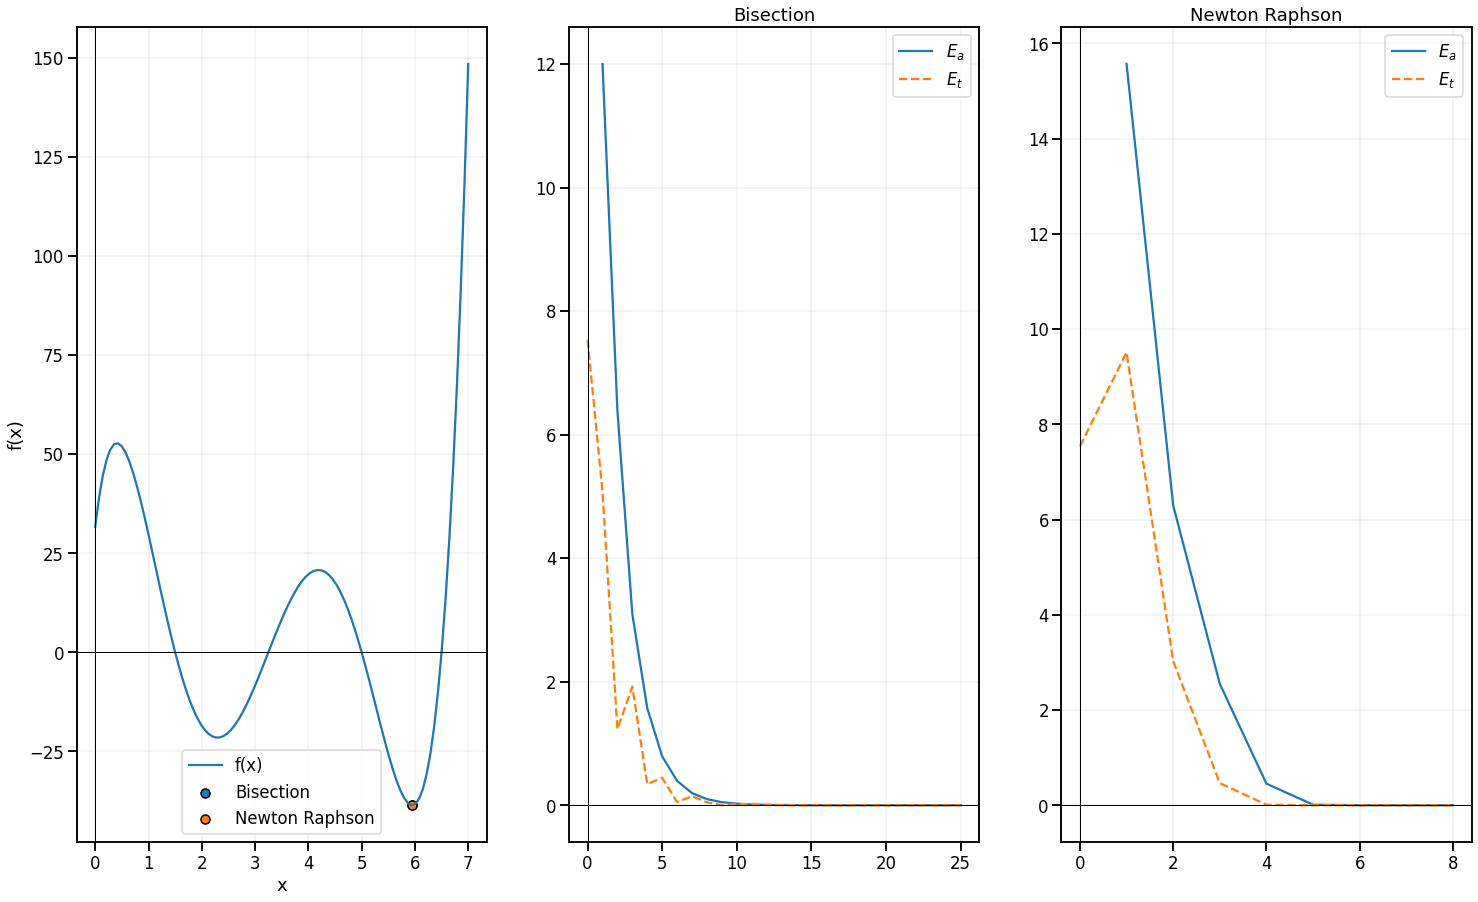

In [ ]:

X1, res1 = BisectionOpt(f1,4,7,xtrue=5.9483)
X2, res2 = NewtonRaphsonOpt(f1,5.5,xtrue=5.9483)

print(res1)
print('')
print(res2)

fig,axes = plt.subplots(1,3,squeeze=True,figsize=(25,15))
ax = axes[0]
plot_eq(f1,(0,7),ax)
plot_opt(f1,X1,ax,'Bisection')
plot_opt(f1,X2,ax,'Newton Raphson')
plot_err(res1,axes[1],'Bisection')
plot_err(res2,axes[2],'Newton Raphson')
ax.legend()

23 bisections required for a tolerance of 1e-06.
numerical root = 5.145734779536724
approx. error  = 7.239569192871043e-07%
       x_low      x_up           dfx    x_root            Ea         Et
0   2.000000  7.000000           NaN  4.500000           NaN  12.549021
1   4.500000  7.000000 -2.743092e+00  5.750000  2.173913e+01  11.742917
2   4.500000  5.750000  4.028325e+00  5.125000  1.219512e+01   0.403052
3   5.125000  5.750000 -2.462738e-01  5.437500  5.747126e+00   5.669933
4   5.125000  5.437500  3.159202e+00  5.281250  2.958580e+00   2.633440
5   5.125000  5.281250  1.604327e+00  5.203125  1.501502e+00   1.115194
6   5.125000  5.203125  6.877634e-01  5.164062  7.564297e-01   0.356071
7   5.125000  5.164062  2.192388e-01  5.144531  3.796507e-01   0.023490
8   5.144531  5.164062 -1.435532e-02  5.154297  1.894657e-01   0.166290
9   5.144531  5.154297  1.022898e-01  5.149414  9.482268e-02   0.071400
10  5.144531  5.149414  4.392203e-02  5.146973  4.743383e-02   0.023955
11  5.144531

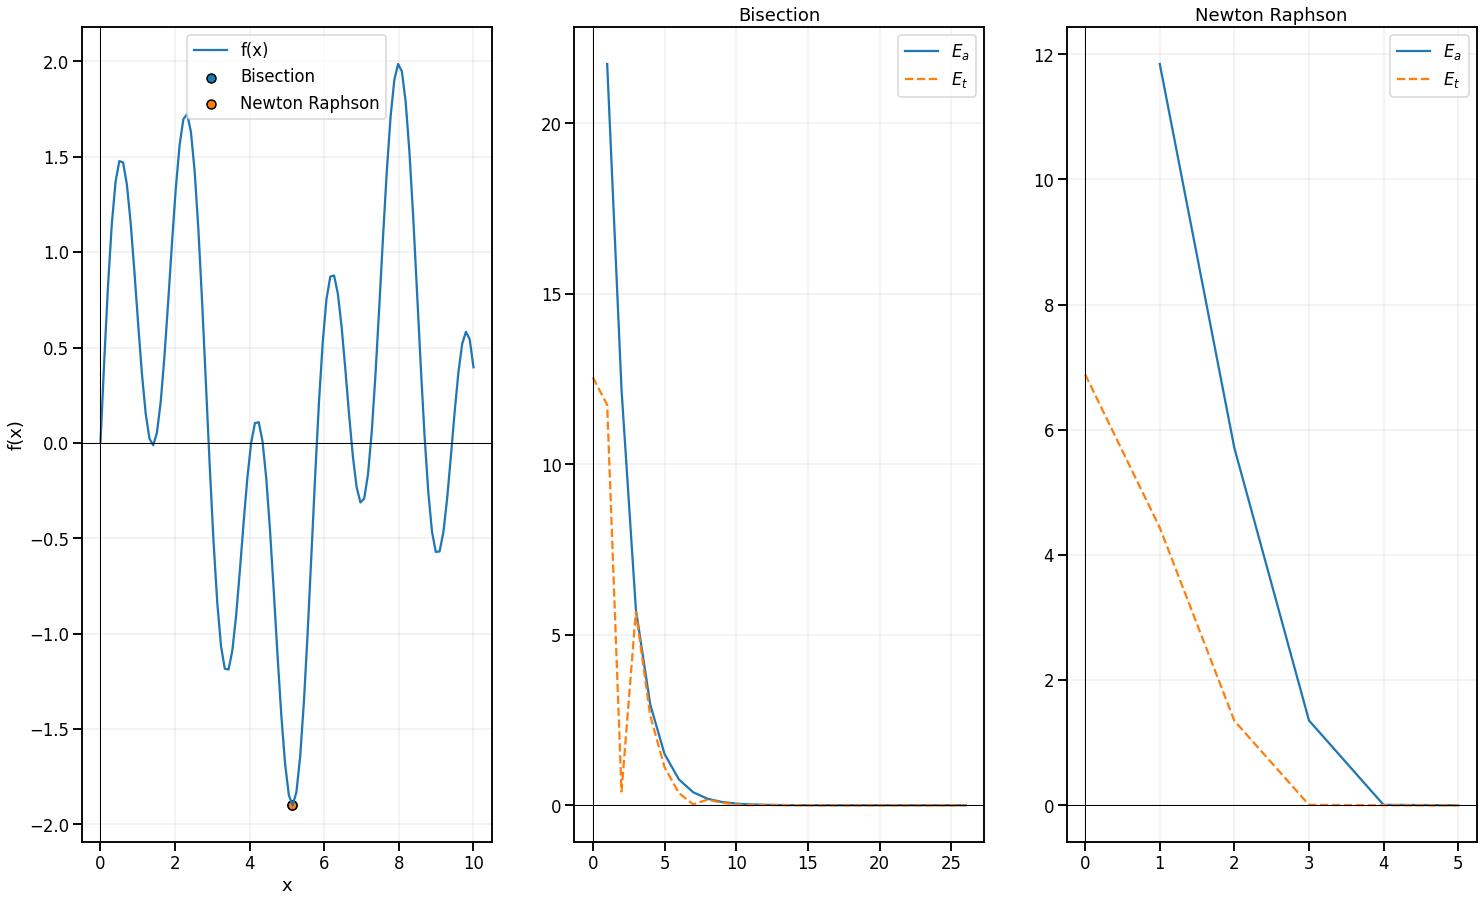

In [ ]:
X1, res1 = BisectionOpt(f2,2,7,xtrue=5.14574)
X2, res2 = NewtonRaphsonOpt(f2,5.5,xtrue=5.14574)

print(res1)
print('')
print(res2)

fig,axes = plt.subplots(1,3,squeeze=True,figsize=(25,15))
ax = axes[0]
plot_eq(f2,(0,10),ax)
plot_opt(f2,X1,ax,'Bisection')
plot_opt(f2,X2,ax,'Newton Raphson')
plot_err(res1,axes[1],'Bisection')
plot_err(res2,axes[2],'Newton Raphson')
ax.legend()

21 bisections required for a tolerance of 1e-06.
numerical root = 0.9660853117704391
approx. error  = 9.254562219879021e-07%
       x_low      x_up           dfx    x_root            Ea         Et
0   0.000000  1.200000           NaN  0.600000           NaN  37.893728
1   0.600000  1.200000 -4.341931e+00  0.900000  3.333333e+01   6.840592
2   0.900000  1.200000 -2.204133e+01  1.050000  1.428571e+01   8.685976
3   0.900000  1.050000  3.161124e+01  0.975000  7.692308e+00   0.922692
4   0.900000  0.975000  4.464522e+00  0.937500  4.000000e+00   2.958950
5   0.937500  0.975000 -1.274752e+01  0.956250  1.960784e+00   1.018129
6   0.956250  0.975000 -4.743640e+00  0.965625  9.708738e-01   0.047718
7   0.965625  0.975000 -2.273668e-01  0.970312  4.830918e-01   0.437487
8   0.965625  0.970312  2.105106e+00  0.967969  2.421308e-01   0.194884
9   0.965625  0.967969  9.344190e-01  0.966797  1.212121e-01   0.073583
10  0.965625  0.966797  3.522799e-01  0.966211  6.064281e-02   0.012932
11  0.96562

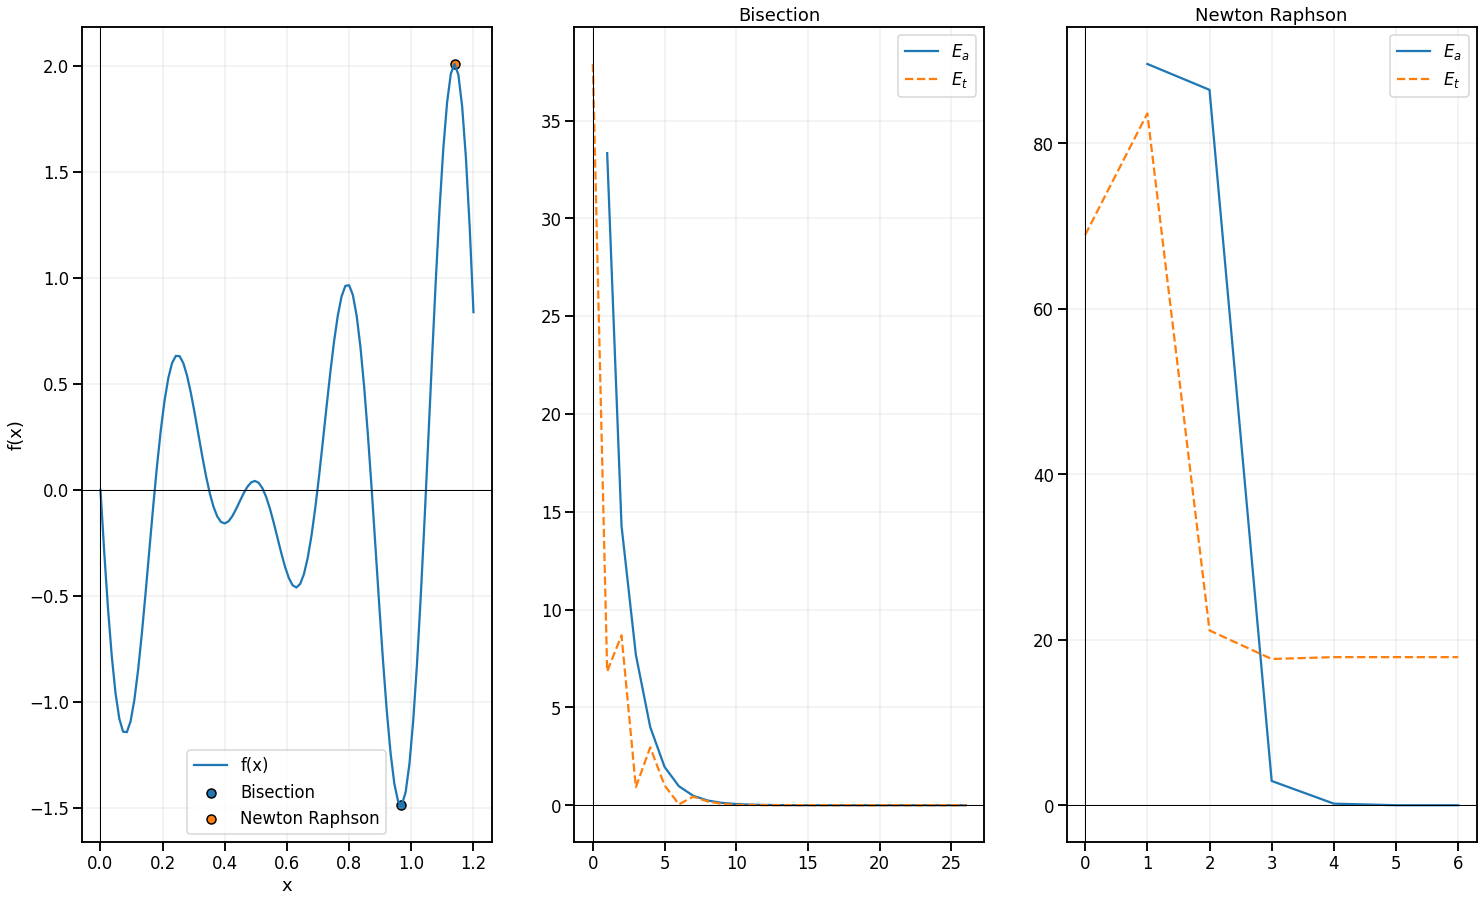

In [ ]:
X1, res1 = BisectionOpt(f3,0,1.2,xtrue=0.966086)
X2, res2 = NewtonRaphsonOpt(f3,0.3,xtrue=0.966086)

print(res1)
print('')
print(res2)

fig,axes = plt.subplots(1,3,squeeze=True,figsize=(25,15))
ax = axes[0]
plot_eq(f3,(0,1.2),ax)
plot_opt(f3,X1,ax,'Bisection')
plot_opt(f3,X2,ax,'Newton Raphson')
plot_err(res1,axes[1],'Bisection')
plot_err(res2,axes[2],'Newton Raphson')
ax.legend()

Some examples of comments you could say in your discussion: 
*   In f3, the global min and max are adjacent. Depending on the inital guess, Newton Raphson will converge on different stationary points. 
*   Newton raphson converges much faster. 
*   Newton raphson evaluation cost associated with the f(x) and f(x+h)
*   Bisection has less function evaluations, but more iterations. 